# LYSO noise analysis

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import scipy.integrate as integ
from scipy.optimize import curve_fit
import simulation_utility as su
import experimental_utility as eu
from numpy import mean
import time
import json
import os
import math

## Simulation

### PE's pulses reference

Emission at angle 0, with 0.25eV of initial energy, and a 25kV E_fields

In [2]:
#Read data and show pulses
#Use "../data/decay", or "/path_to_simulation/ABALONE/ABALONE_GEANT4/results/SiPM"
wfs_pe=su.read_waveforms_from_json(path='../data/decay', spec='-PE', plot=False)

../data/SiPM_readout_1_0_run_0-PE.txt
Number of waveforms 1147, time to read 1.23


In [3]:
#Calculate areas and integrals
int_pe=su.calculate_integrals(wfs_pe, nn=0, inf=1000, sup=1500, plot=0, calc_int=1)

Total events: 1147
2000


n. events: 1147


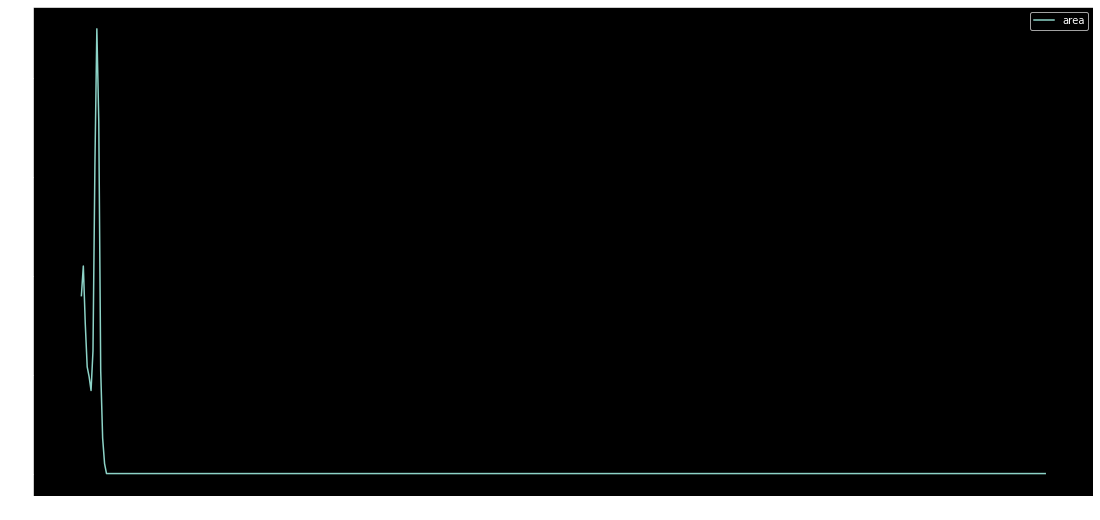

In [4]:
#Plot the area/integral spectrum
su.plot_area(int_pe['area'],int_pe['integral'], xrange=(0,500000), bins=500,log=0)

n. events: 1147


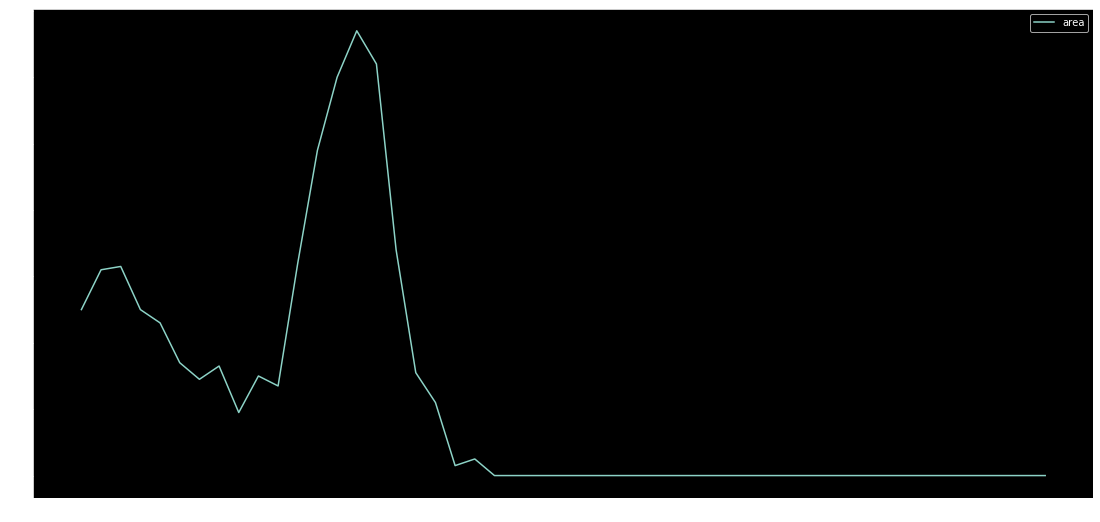

In [5]:
#Plot the area/integral spectrum
su.plot_area(int_pe['area'],int_pe['integral'], xrange=(0,30000), bins=50,log=0)

### LYSO pulses

The E_field needs to be disabled (core dumped error)

#### With thermal noise

In [2]:
#Read data and show pulses
#Use "../data", or "/path_to_simulation/ABALONE/ABALONE_GEANT4/results/SiPM"
wfs_LYSO=su.read_waveforms_from_json(path='../data/decay', spec='-LYSO', plot=False)

../data/SiPM_readout_1_0_run_0-LYSO.txt
Number of waveforms 14168, time to read 14.11


In [3]:
#Calculate areas and integrals
int_LYSO=su.calculate_integrals(wfs_LYSO, nn=0, inf=1000, sup=1500, plot=0, calc_int=1)

Total events: 14168
2000
event n. 5000, time to process: 7.29
event n. 10000, time to process: 14.49


n. events: 14168
Max= 368 , Position= 4000.0


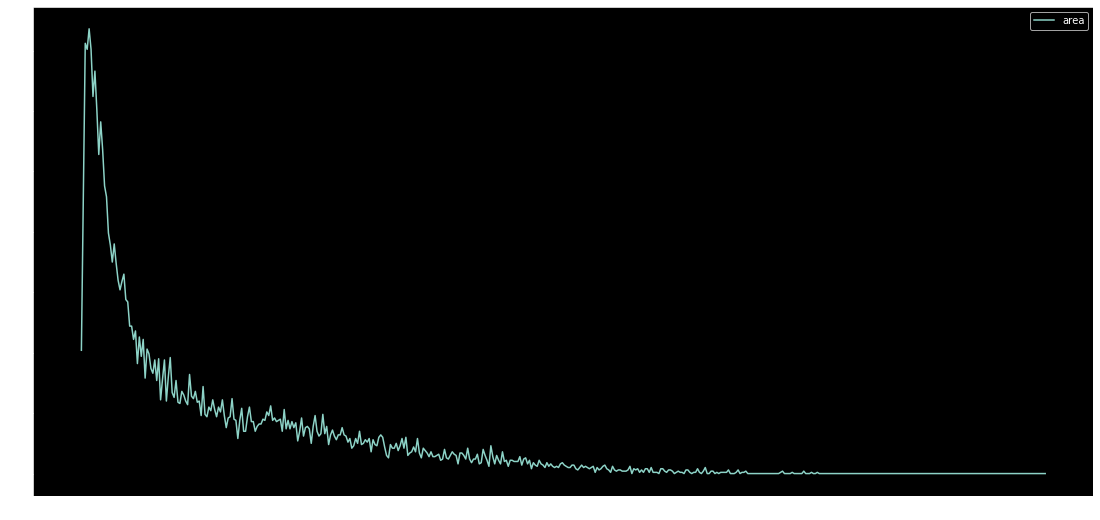

In [4]:
#Plot the area/integral spectrum
su.plot_area(int_LYSO['area'],int_LYSO['integral'], xrange=(0,500000), bins=500, log=0)

n. events: 14168
Max= 232 , Position= 2400.0


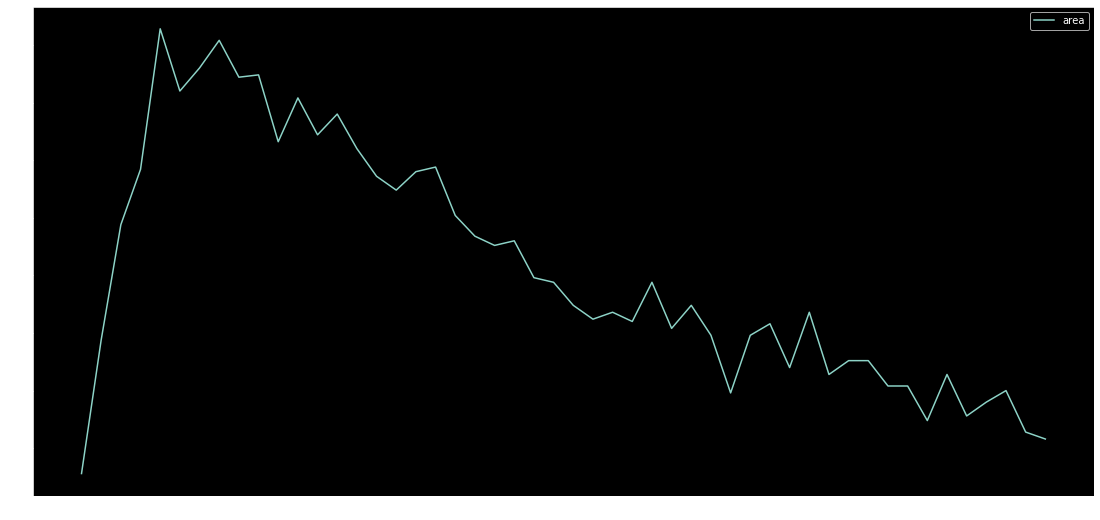

In [5]:
#Plot the area/integral spectrum
su.plot_area(int_LYSO['area'],int_LYSO['integral'], xrange=(0,30000), bins=50, log=0)

#### Without thermal noise

In [6]:
#Read data and show pulses
#Use "../data/decay", or "/path_to_simulation/ABALONE/ABALONE_GEANT4/results/SiPM"
wfs_LYSO_noth=su.read_waveforms_from_json(path='../data/decay', spec='-LYSO-noth', plot=False)

../data/SiPM_readout_1_0_run_0-LYSO-noth.txt
Number of waveforms 19998, time to read 10.33


In [7]:
#Calculate areas and integrals
#int_LYSO=su.calculate_integrals(wfs_LYSO_noth, nn=0, inf=0, sup=600, plot=0, calc_int=0)
int_LYSO_noth=su.calculate_integrals_simple(wfs_LYSO_noth, inf=0, sup=600)

Total events: 19998
Max= 350574.9074090003 , position= 19936


n. events: 19998
Max= 3.0303030303030302e-05 , Position= 3000.0


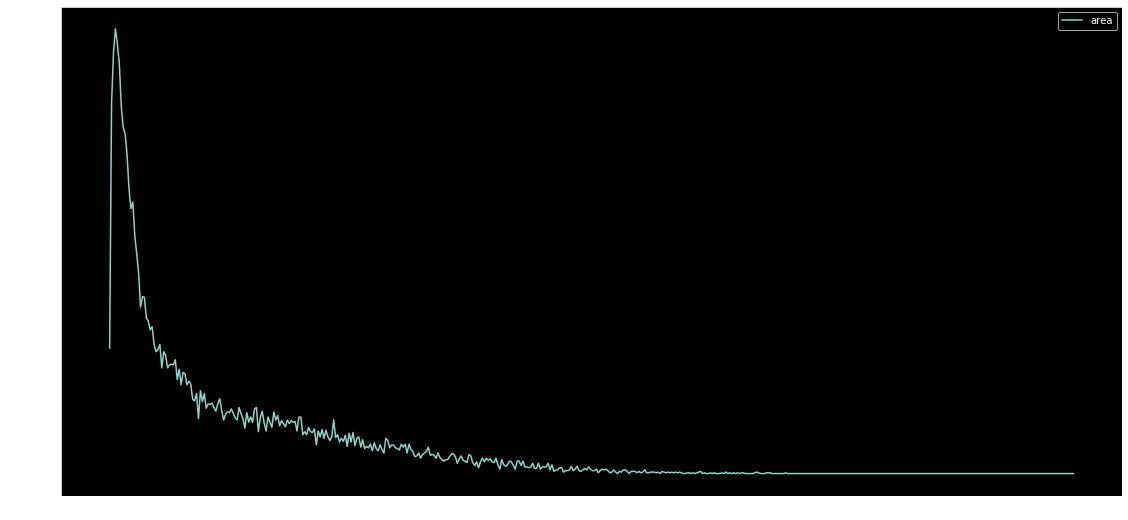

In [8]:
#Plot the area/integral spectrum
#add parameters to normalize
su.plot_area(int_LYSO_noth['area'], xrange=(0,500000), bins=500, log=0, norm=True)

n. events: 19998
Max= 8.637202660815659e-05 , Position= 3375.0


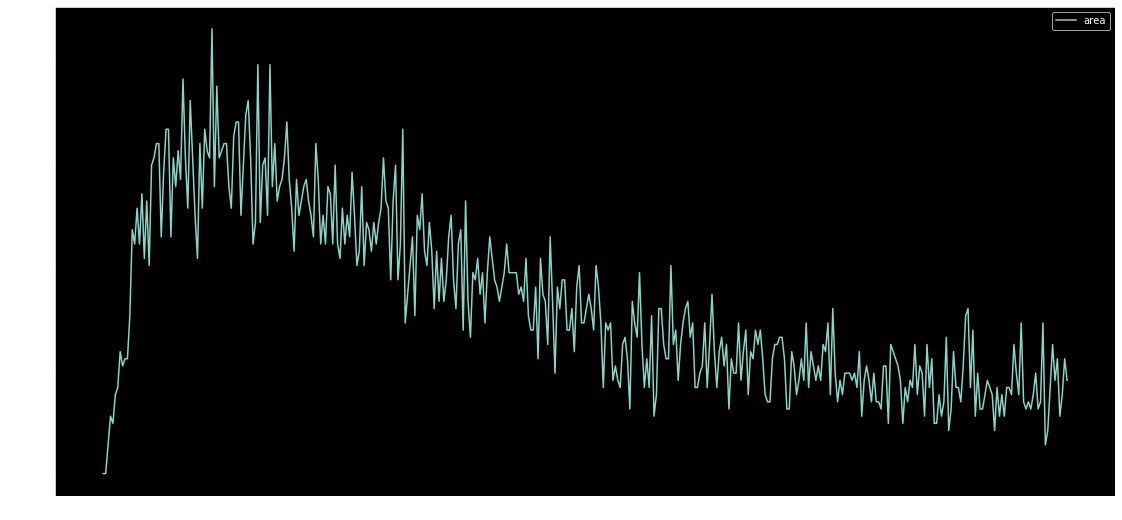

In [9]:
#Plot the area/integral spectrum
su.plot_area(int_LYSO_noth['area'], xrange=(0,30000), bins=400, log=0, norm=True)

## Experimental

### Experimental data for 30V

In [10]:
#File loading
dataRef=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1025_ABALONE_0kV_SiPM2_30V_thr30_Ref_noT.dat', samples=1024)

In [11]:
#Area acquisition
areaRef=eu.area(dataRef)
#areaRef

Number of events:  92444
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Unable to determine the integral limit b for waveform:  13297
Unable to determine the integral limit b for waveform:  13606
Unable to determine the integral limit b for waveform:  83434


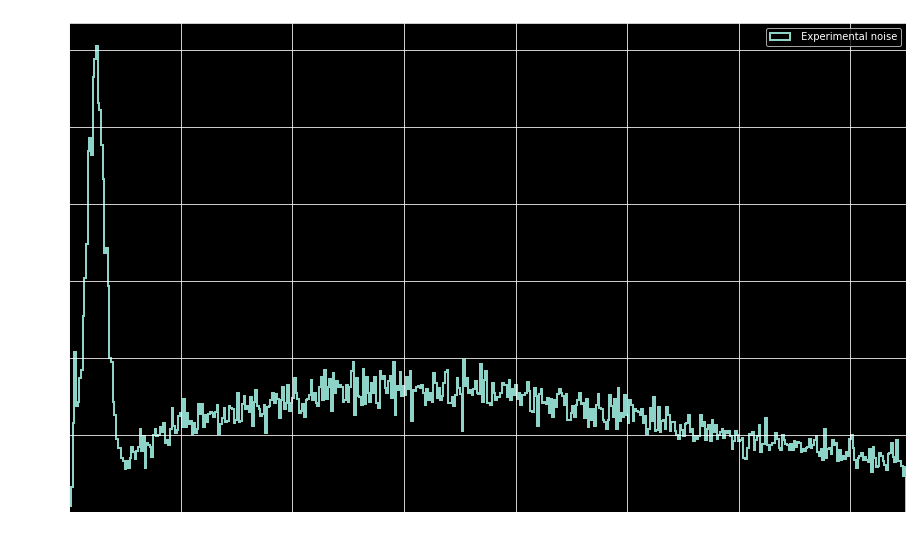

In [17]:
#Area histogram
area_space=np.linspace(0,15000,500)
plt.figure(figsize=(15,9))

hist_Ref=plt.hist(areaRef['area'],bins=area_space,histtype='step',lw=2,density=True, label=' Experimental noise')
#normalize against the maximum to avoid the dependance of activity
norm_Ref=[float(i)/max(hist_Ref[0]) for i in hist_Ref[0]]

#plt.yscale('log')
plt.xlim(0,15000)
plt.ylabel('Counts'); plt.xlabel('Channel')
plt.title('Normalized area histogram for 30V')
plt.grid(True)
#plt.plot(hist_Ref[1][:-1], norm_Ref, label="Noise")
plt.plot()
plt.legend()
plt.show()

## Comments
The integral fit is not optimized and a lot of events are not processed with the method. The 'area' variable is here used.<br />
<br />
Other simulations could be done with external radioactive sources (Am, Ba,...) to help with the calibration.<br />
<br />
Show the maximum and normalize with the area=1.<br />
<br />
Ask valerio to have the data (and notebooks to analyse) about the calibration of the SiPM. To put those info (like rising time etc) in the simulation. Compare simul with data<br />
<br />
We need to calibrate the simulation. So launch for exemple a 25KeV e- in the SiPM and see the area of the pulse. Do this with multiple energies and plot the area in function of the energy. 